In [42]:
import numpy as np
import model as backend
import matplotlib.pyplot as plt
# %matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import copy

In [2]:
Recording = backend.Model()

In [3]:
exp = copy.deepcopy(Recording)

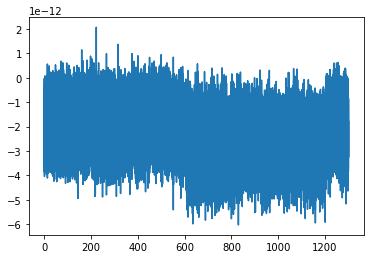

In [4]:
plt.plot(exp['raw_'][0]['time'],exp['raw_'][0]['trace'])

In [5]:
exp.call_operation('BC_',[[0,10],[125,200]],'poly',1)

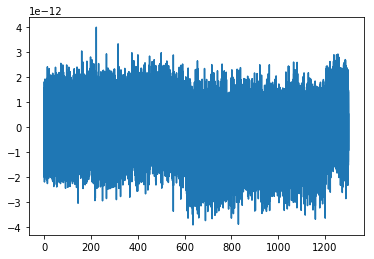

In [6]:
plt.plot(exp['BC_'][0]['time'],exp['BC_'][0]['trace'])

In [7]:
exp.keys(), exp.currentDatakey

(dict_keys(['raw_', 'BC_']), 'BC_')

In [8]:
exp.call_operation('FILTER_',filterFrequency = 1e3)

In [9]:
exp.keys(), exp.currentDatakey

(dict_keys(['raw_', 'BC_', 'BC_FILTER_']), 'BC_FILTER_')

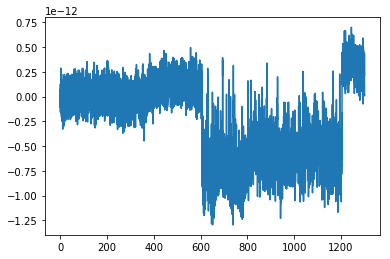

In [10]:
plt.plot(exp['BC_FILTER_'][0]['time'],exp['BC_FILTER_'][0]['trace'])

In [11]:
currentDataKey = 'BC_FILTER_'
data = np.array([])
for episode in exp[currentDataKey]:
    data = np.hstack([data,episode['trace']])

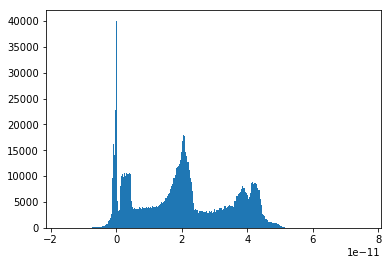

In [12]:
n, b, p = plt.hist(data, 500)

In [13]:
time = exp['BC_FILTER_'][0]['time']
trace = exp['BC_FILTER_'][0]['trace']

In [16]:
exp = backend.Model(filename='data/170922 004 Copy Export.mat')

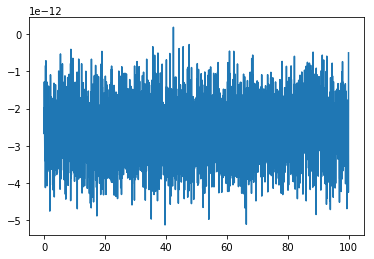

In [17]:
plt.plot(exp['raw_'][3]['time'],exp['raw_'][3]['trace'])

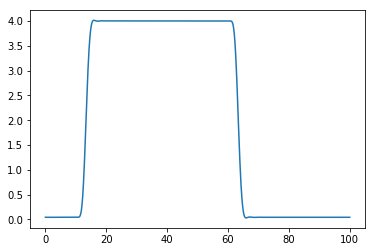

In [18]:
plt.plot(exp['raw_'][0]['time'],exp['raw_'][0]['piezo'])

In [19]:
exp.call_operation('BC_',[[0,10],[75,100]])

In [20]:
exp.call_operation('FILTER_')

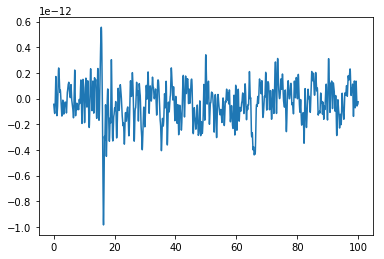

In [21]:
plt.plot(exp['BC_FILTER_'][0]['time'],exp['BC_FILTER_'][0]['trace'])

In [22]:
def piezo_selection(time,piezo,trace,active=True):
    maxPiezo = np.max(np.abs(piezo))
    if active:
        indices = np.where((maxPiezo-np.abs(piezo))/maxPiezo<.05)
    else:
        indices = np.where(np.abs(piezo)/maxPiezo<.05)
    return time[indices],piezo[indices], trace[indices]

In [84]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000000)
hist, bins = np.histogram(x, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plot = plt.bar(center, hist, width=width)

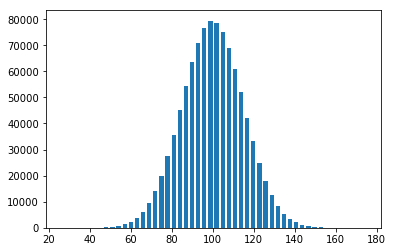

In [85]:
plt.show(plot)

In [14]:
x = np.array([[1,1],[2,2]])

In [20]:
y = np.array([x,x])

In [21]:
y

array([[[1, 1],
        [2, 2]],

       [[1, 1],
        [2, 2]]])

In [95]:
import numpy as np 
import matplotlib.pyplot as plt

def piezo_selection(time, piezo, trace, active = True, deviation = 0.05):
    """
    Selects part of the episode based on the Piezo voltage.
    The selection is done by choosing extracting the data from those time
    points where the value of the piezo voltage is either within a certain
    range (percentage wise) of the maximum or below a certain percentage 
    of the maximum.
    Works in relative terms, i.e. it does not matter if piezo voltage is
    positive or negative. Only works for blocks of the same amplitude.
    Parameters:
        time [1D array of floats] - Vector containing the time points.
        piezo [1D array of floats] - Vector of piezo voltages.
        trace [1D array of floats] - Vector of current trace.
        active [boolean] - If true return time points at which piezo 
                           voltage is within `deviation` percent of the 
                           maximum piezo voltage.
        deviation [float] - Deviation, as a percentage, from the maximum
                            piezo voltage or threshold below which voltage
                            should be.
    Returns:
        time [1D array of floats] - The timestamps of the selected points.
        piezo [1D array of floats] - The piezo voltage at selected points.
        trace [1D array of floats] - The current at selected points.
    """
    maxPiezo = np.max(np.abs(piezo))
    if active:
        indices = np.where((maxPiezo-np.abs(piezo))/maxPiezo<deviation)
    else:
        indices = np.where(np.abs(piezo)/maxPiezo<deviation)
    time = time[indices]
    piezo = piezo[indices]
    trace = trace[indices] 
    return time, piezo, trace

def create_histogram(traces, bins):
    """
    Create a histogram of the values in `traces`. Keyword arguments for
    `np.histogram` can be given as kwargs here.
    Parameters:
        traces [numpy array] - Array containing all the values for the 
                               histogram.
        **kwargs - Keyword arguments for the `numpy.histogram` function
    """
    traces = traces.flatten()
    hist, bins = np.histogram(traces, bins)
    return hist, bins

def all_point_histogram(time, piezos, traces, active = True, 
                        deviation=.05, bins = 200, **kwargs):
    """
    Creates an all-point-histogram of selected values in trace. The values
    are selected based on whether or not the piezo device is active.
    Parameters:
        time [1D array of floats] - Vector containing the time points.
        piezo [array of floats] - Vector of piezo voltages.
        trace [array of floats] - Vector of current trace.
        active [boolean] - If true return time points at which piezo 
                           voltage is within `deviation` percent of the 
                           maximum piezo voltage.
        deviation [float] - Deviation, as a percentage, from the maximum
                            piezo voltage or threshold below which voltage
                            should be.
        **kwargs - Keyword arguments for the `pyplot.bar` function.
    Returns:
        plot - Object containing the plot, can be shows by pyplot.`show()`
        time [1D array of floats] - The timestamps of the selected points.
        piezo_list [2D array of floats] - Each row contains the piezo values
                                         at the selected times for an episode.
        trace_list [2D array of floats] - Each row contains the current values
                                         at the selected times for an episode.
    """
    trace_list = []
    piezo_list = []
    for p, t in zip(piezos, traces):
        time_selection, piezo, trace = piezo_selection(time, p, t, active, deviation)
        piezo_list.append(piezo)
        trace_list.append(trace)
    trace_list = np.asarray(trace_list)
    piezo_list = np.asarray(piezo_list)
    hist, bins = create_histogram(trace_list, bins)
    center = (bins[:-1] + bins[1:]) / 2
    width = (bins[1] - bins[0])
    plot = plt.bar(center, hist, width=width, **kwargs)
    return plot, time_selection, piezo_list, trace_list

In [77]:
eps = backend.Model()

In [78]:
piezos = []
traces = []
time = eps['raw_'][0]['time']
for episode in eps['raw_']:
    piezos.append(episode['piezo'])
    traces.append(episode['trace'])

In [96]:
plot, times, piezo_list, trace_list = all_point_histogram(time,piezos,traces)

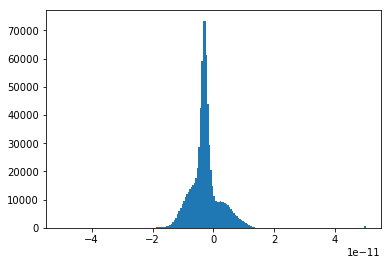

In [97]:
plt.show(plot)

In [70]:
plt.show()